In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/WineQuality.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
df.fillna(0,inplace= True)

In [ ]:
df.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.753886,7.205472,0.339273,0.318575,5.442650,0.056024,30.525319,115.744574,0.994697,3.213937,0.530888,10.491801,5.818378,0.953363
std,0.430779,1.326280,0.164978,0.145393,4.758351,0.035044,17.749400,56.521855,0.002999,0.200337,0.149351,1.192712,0.873255,0.730121
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.987110,0.000000,0.000000,8.000000,3.000000,0.000000
25%,1.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,1.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,1.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,2.000000


In [ ]:
df.cumprod

<bound method NDFrame._add_numeric_operations.<locals>.cumprod of       type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        1            7.0             0.270         0.36            20.7   
1        1            6.3             0.300         0.34             1.6   
2        1            8.1             0.280         0.40             6.9   
3        1            7.2             0.230         0.32             8.5   
4        1            7.2             0.230         0.32             8.5   
...    ...            ...               ...          ...             ...   
6492     0            6.2             0.600         0.08             2.0   
6493     0            5.9             0.550         0.10             2.2   
6494     0            6.3             0.510         0.13             2.3   
6495     0            5.9             0.645         0.12             2.0   
6496     0            6.0             0.310         0.47             3.6   

      chlorides  free

dont forget to drop faetures athat are not numerical


In [ ]:
df.drop("type",axis=1).mean()

fixed acidity             7.205472
volatile acidity          0.339273
citric acid               0.318575
residual sugar            5.442650
chlorides                 0.056024
free sulfur dioxide      30.525319
total sulfur dioxide    115.744574
density                   0.994697
pH                        3.213937
sulphates                 0.530888
alcohol                  10.491801
quality                   5.818378
cluster                   0.953363
dtype: float64

In [ ]:
df.drop("type",axis=1).min()

fixed acidity           0.00000
volatile acidity        0.00000
citric acid             0.00000
residual sugar          0.00000
chlorides               0.00000
free sulfur dioxide     1.00000
total sulfur dioxide    6.00000
density                 0.98711
pH                      0.00000
sulphates               0.00000
alcohol                 8.00000
quality                 3.00000
cluster                 0.00000
dtype: float64

In [ ]:
df[["citric acid"]].mean()

citric acid    0.318575
dtype: float64

In [ ]:
df.drop("type",axis=1).prod()

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)


fixed acidity           0.000000e+00
volatile acidity        0.000000e+00
citric acid             0.000000e+00
residual sugar          0.000000e+00
chlorides               0.000000e+00
free sulfur dioxide              inf
total sulfur dioxide             inf
density                 9.623529e-16
pH                      0.000000e+00
sulphates               0.000000e+00
alcohol                          inf
quality                 0.000000e+00
cluster                 0.000000e+00
dtype: float64

In [ ]:
df.drop("type",axis=1).median()

fixed acidity             7.00000
volatile acidity          0.29000
citric acid               0.31000
residual sugar            3.00000
chlorides                 0.04700
free sulfur dioxide      29.00000
total sulfur dioxide    118.00000
density                   0.99489
pH                        3.21000
sulphates                 0.51000
alcohol                  10.30000
quality                   6.00000
cluster                   1.00000
dtype: float64

In [ ]:
df.drop("type",axis=1).mode()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
0,6.8,0.28,0.3,2.0,0.044,29.0,111.0,0.9972,3.16,0.5,9.5,6.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9976,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.count()

type                    6497
fixed acidity           6497
volatile acidity        6497
citric acid             6497
residual sugar          6497
chlorides               6497
free sulfur dioxide     6497
total sulfur dioxide    6497
density                 6497
pH                      6497
sulphates               6497
alcohol                 6497
quality                 6497
cluster                 6497
dtype: int64

In [ ]:
df.drop("type",axis=1).cumsum()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
0,7.00,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.80,6,0
1,13.30,0.570,0.70,22.3,0.094,59.0,302.0,1.99500,6.30,0.94,18.30,12,1
2,21.40,0.850,1.10,29.2,0.144,89.0,399.0,2.99010,9.56,1.38,28.40,18,2
3,28.60,1.080,1.42,37.7,0.202,136.0,585.0,3.98570,12.75,1.78,38.30,24,2
4,35.80,1.310,1.74,46.2,0.260,183.0,771.0,4.98130,15.94,2.18,48.20,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,46789.85,2202.240,2068.96,35350.8,363.710,198205.0,751815.5,6458.56221,20867.05,3447.06,68121.83,37779,6187
6493,46795.75,2202.790,2069.06,35353.0,363.772,198244.0,751866.5,6459.55733,20870.57,3447.06,68133.03,37785,6188
6494,46802.05,2203.300,2069.19,35355.3,363.848,198273.0,751906.5,6460.55307,20873.99,3447.81,68144.03,37791,6190
6495,46807.95,2203.945,2069.31,35357.3,363.923,198305.0,751950.5,6461.54854,20877.56,3448.52,68154.23,37796,6192


In [ ]:
df.drop("type",axis=1).max()

fixed acidity            15.90000
volatile acidity          1.58000
citric acid               1.66000
residual sugar           65.80000
chlorides                 0.61100
free sulfur dioxide     289.00000
total sulfur dioxide    440.00000
density                   1.03898
pH                        4.01000
sulphates                 2.00000
alcohol                  14.90000
quality                   9.00000
cluster                   2.00000
dtype: float64

In [ ]:
df.drop("type",axis=1).std()

fixed acidity            1.326280
volatile acidity         0.164978
citric acid              0.145393
residual sugar           4.758351
chlorides                0.035044
free sulfur dioxide     17.749400
total sulfur dioxide    56.521855
density                  0.002999
pH                       0.200337
sulphates                0.149351
alcohol                  1.192712
quality                  0.873255
cluster                  0.730121
dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
 13  cluster               6497 non-null   int32  
dtypes: float64(11), int32(1), int64(2)
memory usage: 685.4 KB


In [ ]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
df['type'] = label_encoder.fit_transform(df['type'])

In [ ]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
x = df.drop(['quality'], axis=1)
y = df['quality']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
scaler = StandardScaler()
feature_scale = scaler.fit_transform(x)

In [ ]:
kmeans=KMeans(n_clusters= 3 , random_state=42)
df['cluster']=kmeans.fit_predict(feature_scale)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


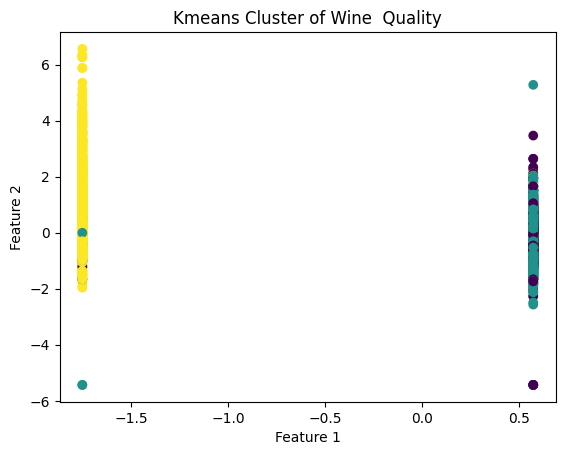

In [ ]:
plt.scatter(feature_scale[:,0], feature_scale[:,1], c=df['cluster'], cmap='viridis')
plt.title("Kmeans Cluster of Wine  Quality")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
avg=silhouette_score(feature_scale, df["cluster"])
print("Silhouette Score :", avg)

Silhouette Score : 0.2616412860459056
